In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore') 

import matplotlib.pyplot as plt
import seaborn as sns  

import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df=pd.read_csv("Employees Promotion.csv")

In [3]:
df.head()


EmployeeID         Department  Region_Employment   Education Level Gender  \
0       65438  Sales & Marketing                  7  Master's & above      f   
1       65141         Operations                 22        Bachelor's      m   
2        7513  Sales & Marketing                 19        Bachelor's      m   
3        2542  Sales & Marketing                 23        Bachelor's      m   
4       48945         Technology                 26        Bachelor's      m   

  Recruitment Channel  NO_Trainings_LstYear   Age  previous_year_rating  \
0            sourcing                     1  35.0                   5.0   
1               other                     1  30.0                   5.0   
2            sourcing                     1  34.0                   3.0   
3               other                     2  39.0                   1.0   
4               other                     1  45.0                   3.0   

   Service Length Awards  Avg_Training_Score Is Promoted  
0               8     NO                49.0          NO  
1               4     NO                60.0          NO  
2               7     NO                50.0          NO  
3              10     NO                50.0          NO  
4               2     NO                73.0          NO

In [4]:
df.shape


(54808, 13)

In [5]:
df.size

712504

In [6]:
df.tail()

EmployeeID         Department  Region_Employment   Education Level  \
54803        3030         Technology                 14        Bachelor's   
54804       74592         Operations                 27  Master's & above   
54805       13918          Analytics                  1        Bachelor's   
54806       13614  Sales & Marketing                  9               NaN   
54807       51526                 HR                 22        Bachelor's   

      Gender Recruitment Channel  NO_Trainings_LstYear   Age  \
54803      m            sourcing                     1  48.0   
54804      f                 NaN                     1  37.0   
54805      m               other                     1   0.0   
54806      m            sourcing                     1  29.0   
54807      m               other                     1  27.0   

       previous_year_rating  Service Length Awards  Avg_Training_Score  \
54803                   3.0              17     NO                78.0   
54804                   2.0               6     NO                56.0   
54805                   5.0               3     NO                79.0   
54806                   1.0               2     NO                 NaN   
54807                   1.0               5     NO                49.0   

      Is Promoted  
54803          NO  
54804          NO  
54805          NO  
54806          NO  
54807          NO

In [7]:
df.describe()

EmployeeID  Region_Employment  NO_Trainings_LstYear           Age  \
count  54808.000000       54808.000000          54808.000000  54268.000000   
mean   39195.830627          14.195045              1.253011     34.586644   
std    22586.581449          10.086273              0.609264      8.114136   
min        1.000000           1.000000              1.000000      0.000000   
25%    19669.750000           4.000000              1.000000     29.000000   
50%    39225.500000          13.000000              1.000000     33.000000   
75%    58730.500000          22.000000              1.000000     39.000000   
max    78298.000000          34.000000             10.000000     60.000000   

       previous_year_rating  Service Length  Avg_Training_Score  
count          50684.000000    54808.000000        52248.000000  
mean               3.329256        5.865512           63.712238  
std                1.259993        4.265094           13.521910  
min                1.000000        1.000000           39.000000  
25%                3.000000        3.000000           51.000000  
50%                3.000000        5.000000           60.000000  
75%                4.000000        7.000000           77.000000  
max                5.000000       37.000000           99.000000

In [8]:
df.isnull()

EmployeeID  Department  Region_Employment  Education Level  Gender  \
0           False       False              False            False   False   
1           False       False              False            False   False   
2           False       False              False            False   False   
3           False       False              False            False   False   
4           False       False              False            False   False   
...           ...         ...                ...              ...     ...   
54803       False       False              False            False   False   
54804       False       False              False            False   False   
54805       False       False              False            False   False   
54806       False       False              False             True   False   
54807       False       False              False            False   False   

       Recruitment Channel  NO_Trainings_LstYear    Age  previous_year_rating  \
0                    False                 False  False                 False   
1                    False                 False  False                 False   
2                    False                 False  False                 False   
3                    False                 False  False                 False   
4                    False                 False  False                 False   
...                    ...                   ...    ...                   ...   
54803                False                 False  False                 False   
54804                 True                 False  False                 False   
54805                False                 False  False                 False   
54806                False                 False  False                 False   
54807                False                 False  False                 False   

       Service Length  Awards  Avg_Training_Score  Is Promoted  
0               False   False               False        False  
1               False   False               False        False  
2               False   False               False        False  
3               False   False               False        False  
4               False   False               False        False  
...               ...     ...                 ...          ...  
54803           False   False               False        False  
54804           False   False               False        False  
54805           False   False               False        False  
54806           False   False                True        False  
54807           False   False               False        False  

[54808 rows x 13 columns]

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
54803    False
54804    False
54805    False
54806    False
54807    False
Length: 54808, dtype: bool

In [10]:
df.columns

Index(['EmployeeID', 'Department', 'Region_Employment', 'Education Level',
       'Gender', 'Recruitment Channel', 'NO_Trainings_LstYear', 'Age',
       'previous_year_rating', 'Service Length', 'Awards',
       'Avg_Training_Score', 'Is Promoted'],
      dtype='object')

In [11]:
df['Department']

0        Sales & Marketing
1               Operations
2        Sales & Marketing
3        Sales & Marketing
4               Technology
               ...        
54803           Technology
54804           Operations
54805            Analytics
54806    Sales & Marketing
54807                   HR
Name: Department, Length: 54808, dtype: object

In [12]:
df[['Is Promoted','Education Level']]

Is Promoted   Education Level
0              NO  Master's & above
1              NO        Bachelor's
2              NO        Bachelor's
3              NO        Bachelor's
4              NO        Bachelor's
...           ...               ...
54803          NO        Bachelor's
54804          NO  Master's & above
54805          NO        Bachelor's
54806          NO               NaN
54807          NO        Bachelor's

[54808 rows x 2 columns]

In [13]:
df.iloc[1]

EmployeeID                   65141
Department              Operations
Region_Employment               22
Education Level         Bachelor's
Gender                           m
Recruitment Channel          other
NO_Trainings_LstYear             1
Age                           30.0
previous_year_rating           5.0
Service Length                   4
Awards                          NO
Avg_Training_Score            60.0
Is Promoted                     NO
Name: 1, dtype: object

In [14]:
df[df['Age'] > 20]

EmployeeID         Department  Region_Employment   Education Level  \
0           65438  Sales & Marketing                  7  Master's & above   
1           65141         Operations                 22        Bachelor's   
2            7513  Sales & Marketing                 19        Bachelor's   
3            2542  Sales & Marketing                 23        Bachelor's   
4           48945         Technology                 26        Bachelor's   
...           ...                ...                ...               ...   
54802        6915  Sales & Marketing                 14        Bachelor's   
54803        3030         Technology                 14        Bachelor's   
54804       74592         Operations                 27  Master's & above   
54806       13614  Sales & Marketing                  9               NaN   
54807       51526                 HR                 22        Bachelor's   

      Gender Recruitment Channel  NO_Trainings_LstYear   Age  \
0          f            sourcing                     1  35.0   
1          m               other                     1  30.0   
2          m            sourcing                     1  34.0   
3          m               other                     2  39.0   
4          m               other                     1  45.0   
...      ...                 ...                   ...   ...   
54802      m               other                     2  31.0   
54803      m            sourcing                     1  48.0   
54804      f                 NaN                     1  37.0   
54806      m            sourcing                     1  29.0   
54807      m               other                     1  27.0   

       previous_year_rating  Service Length Awards  Avg_Training_Score  \
0                       5.0               8     NO                49.0   
1                       5.0               4     NO                60.0   
2                       3.0               7     NO                50.0   
3                       1.0              10     NO                50.0   
4                       3.0               2     NO                73.0   
...                     ...             ...    ...                 ...   
54802                   1.0               2     NO                49.0   
54803                   3.0              17     NO                78.0   
54804                   2.0               6     NO                56.0   
54806                   1.0               2     NO                 NaN   
54807                   1.0               5     NO                49.0   

      Is Promoted  
0              NO  
1              NO  
2              NO  
3              NO  
4              NO  
...           ...  
54802          NO  
54803          NO  
54804          NO  
54806          NO  
54807          NO  

[53818 rows x 13 columns]

In [15]:
df.dropna()

EmployeeID         Department  Region_Employment   Education Level  \
0           65438  Sales & Marketing                  7  Master's & above   
1           65141         Operations                 22        Bachelor's   
2            7513  Sales & Marketing                 19        Bachelor's   
3            2542  Sales & Marketing                 23        Bachelor's   
4           48945         Technology                 26        Bachelor's   
...           ...                ...                ...               ...   
54800       39227                 HR                 11        Bachelor's   
54802        6915  Sales & Marketing                 14        Bachelor's   
54803        3030         Technology                 14        Bachelor's   
54805       13918          Analytics                  1        Bachelor's   
54807       51526                 HR                 22        Bachelor's   

      Gender Recruitment Channel  NO_Trainings_LstYear   Age  \
0          f            sourcing                     1  35.0   
1          m               other                     1  30.0   
2          m            sourcing                     1  34.0   
3          m               other                     2  39.0   
4          m               other                     1  45.0   
...      ...                 ...                   ...   ...   
54800      m               other                     2  34.0   
54802      m               other                     2  31.0   
54803      m            sourcing                     1  48.0   
54805      m               other                     1   0.0   
54807      m               other                     1  27.0   

       previous_year_rating  Service Length Awards  Avg_Training_Score  \
0                       5.0               8     NO                49.0   
1                       5.0               4     NO                60.0   
2                       3.0               7     NO                50.0   
3                       1.0              10     NO                50.0   
4                       3.0               2     NO                73.0   
...                     ...             ...    ...                 ...   
54800                   5.0               3     NO                52.0   
54802                   1.0               2     NO                49.0   
54803                   3.0              17     NO                78.0   
54805                   5.0               3     NO                79.0   
54807                   1.0               5     NO                49.0   

      Is Promoted  
0              NO  
1              NO  
2              NO  
3              NO  
4              NO  
...           ...  
54800          NO  
54802          NO  
54803          NO  
54805          NO  
54807          NO  

[37230 rows x 13 columns]

In [16]:
df.fillna(0)

EmployeeID         Department  Region_Employment   Education Level  \
0           65438  Sales & Marketing                  7  Master's & above   
1           65141         Operations                 22        Bachelor's   
2            7513  Sales & Marketing                 19        Bachelor's   
3            2542  Sales & Marketing                 23        Bachelor's   
4           48945         Technology                 26        Bachelor's   
...           ...                ...                ...               ...   
54803        3030         Technology                 14        Bachelor's   
54804       74592         Operations                 27  Master's & above   
54805       13918          Analytics                  1        Bachelor's   
54806       13614  Sales & Marketing                  9                 0   
54807       51526                 HR                 22        Bachelor's   

      Gender Recruitment Channel  NO_Trainings_LstYear   Age  \
0          f            sourcing                     1  35.0   
1          m               other                     1  30.0   
2          m            sourcing                     1  34.0   
3          m               other                     2  39.0   
4          m               other                     1  45.0   
...      ...                 ...                   ...   ...   
54803      m            sourcing                     1  48.0   
54804      f                   0                     1  37.0   
54805      m               other                     1   0.0   
54806      m            sourcing                     1  29.0   
54807      m               other                     1  27.0   

       previous_year_rating  Service Length Awards  Avg_Training_Score  \
0                       5.0               8     NO                49.0   
1                       5.0               4     NO                60.0   
2                       3.0               7     NO                50.0   
3                       1.0              10     NO                50.0   
4                       3.0               2     NO                73.0   
...                     ...             ...    ...                 ...   
54803                   3.0              17     NO                78.0   
54804                   2.0               6     NO                56.0   
54805                   5.0               3     NO                79.0   
54806                   1.0               2     NO                 0.0   
54807                   1.0               5     NO                49.0   

      Is Promoted  
0              NO  
1              NO  
2              NO  
3              NO  
4              NO  
...           ...  
54803          NO  
54804          NO  
54805          NO  
54806          NO  
54807          NO  

[54808 rows x 13 columns]

In [22]:
df.rename(columns={'Age':'age'},inplace=True)	

In [24]:
df.columns

Index(['EmployeeID', 'Department', 'Region_Employment', 'Education Level',
       'Gender', 'Recruitment Channel', 'NO_Trainings_LstYear', 'age',
       'previous_year_rating', 'Service Length', 'Awards',
       'Avg_Training_Score', 'Is Promoted'],
      dtype='object')

In [26]:
df.drop_duplicates()

EmployeeID         Department  Region_Employment   Education Level  \
0           65438  Sales & Marketing                  7  Master's & above   
1           65141         Operations                 22        Bachelor's   
2            7513  Sales & Marketing                 19        Bachelor's   
3            2542  Sales & Marketing                 23        Bachelor's   
4           48945         Technology                 26        Bachelor's   
...           ...                ...                ...               ...   
54803        3030         Technology                 14        Bachelor's   
54804       74592         Operations                 27  Master's & above   
54805       13918          Analytics                  1        Bachelor's   
54806       13614  Sales & Marketing                  9               NaN   
54807       51526                 HR                 22        Bachelor's   

      Gender Recruitment Channel  NO_Trainings_LstYear   age  \
0          f            sourcing                     1  35.0   
1          m               other                     1  30.0   
2          m            sourcing                     1  34.0   
3          m               other                     2  39.0   
4          m               other                     1  45.0   
...      ...                 ...                   ...   ...   
54803      m            sourcing                     1  48.0   
54804      f                 NaN                     1  37.0   
54805      m               other                     1   0.0   
54806      m            sourcing                     1  29.0   
54807      m               other                     1  27.0   

       previous_year_rating  Service Length Awards  Avg_Training_Score  \
0                       5.0               8     NO                49.0   
1                       5.0               4     NO                60.0   
2                       3.0               7     NO                50.0   
3                       1.0              10     NO                50.0   
4                       3.0               2     NO                73.0   
...                     ...             ...    ...                 ...   
54803                   3.0              17     NO                78.0   
54804                   2.0               6     NO                56.0   
54805                   5.0               3     NO                79.0   
54806                   1.0               2     NO                 NaN   
54807                   1.0               5     NO                49.0   

      Is Promoted  
0              NO  
1              NO  
2              NO  
3              NO  
4              NO  
...           ...  
54803          NO  
54804          NO  
54805          NO  
54806          NO  
54807          NO  

[54808 rows x 13 columns]

In [28]:
df['dept']=df['Department'] + df['Education Level']

In [30]:
df.dept

0        Sales & MarketingMaster's & above
1                     OperationsBachelor's
2              Sales & MarketingBachelor's
3              Sales & MarketingBachelor's
4                     TechnologyBachelor's
                       ...                
54803                 TechnologyBachelor's
54804           OperationsMaster's & above
54805                  AnalyticsBachelor's
54806                                  NaN
54807                         HRBachelor's
Name: dept, Length: 54808, dtype: object

In [32]:
df['dept']=df['Department'].apply(lambda x: x * 2)

In [34]:
df.Department

0        Sales & Marketing
1               Operations
2        Sales & Marketing
3        Sales & Marketing
4               Technology
               ...        
54803           Technology
54804           Operations
54805            Analytics
54806    Sales & Marketing
54807                   HR
Name: Department, Length: 54808, dtype: object

In [36]:
df['dept']=df['EmployeeID'].astype(int)

In [38]:
df.EmployeeID

0        65438
1        65141
2         7513
3         2542
4        48945
         ...  
54803     3030
54804    74592
54805    13918
54806    13614
54807    51526
Name: EmployeeID, Length: 54808, dtype: int64

In [40]:
df.sort_values('EmployeeID',ascending=True)

EmployeeID         Department  Region_Employment   Education Level  \
52690           1          Analytics                  7        Bachelor's   
10257           2            Finance                  2  Master's & above   
32895           4  Sales & Marketing                  2        Bachelor's   
4424            5          Analytics                  7  Master's & above   
41261           7         Operations                 32        Bachelor's   
...           ...                ...                ...               ...   
31061       78292         Operations                  2  Master's & above   
19088       78294  Sales & Marketing                 22        Bachelor's   
52714       78296        Procurement                  2        Bachelor's   
9030        78297         Operations                 13        Bachelor's   
52646       78298        Procurement                  2  Master's & above   

      Gender Recruitment Channel  NO_Trainings_LstYear   age  \
52690      m            sourcing                     2  29.0   
10257      f            sourcing                     1  35.0   
32895      m               other                     1  25.0   
4424       m               other                     2  46.0   
41261      m               other                     1  31.0   
...      ...                 ...                   ...   ...   
31061      m            sourcing                     1   NaN   
19088      m            sourcing                     3  35.0   
52714      f            sourcing                     1  28.0   
9030       f            sourcing                     1  34.0   
52646      f            referred                     1  39.0   

       previous_year_rating  Service Length Awards  Avg_Training_Score  \
52690                   3.0               5     NO                85.0   
10257                   1.0               2     NO                63.0   
32895                   3.0               2     NO                53.0   
4424                    3.0               7     NO                86.0   
41261                   3.0               7     NO                59.0   
...                     ...             ...    ...                 ...   
31061                   2.0              16     NO                57.0   
19088                   3.0               3     NO                49.0   
52714                   5.0               5     NO                70.0   
9030                    5.0               7     NO                56.0   
52646                   5.0              10     NO                67.0   

      Is Promoted   dept  
52690          NO      1  
10257          NO      2  
32895          NO      4  
4424           NO      5  
41261          NO      7  
...           ...    ...  
31061         YES  78292  
19088          NO  78294  
52714          NO  78296  
9030           NO  78297  
52646          NO  78298  

[54808 rows x 14 columns]

In [42]:
df[df['NO_Trainings_LstYear']>2]

EmployeeID         Department  Region_Employment   Education Level  \
43          17423  Sales & Marketing                  2               NaN   
110         48785  Sales & Marketing                 22        Bachelor's   
117          3625        Procurement                 21        Bachelor's   
119         18959         Technology                 15        Bachelor's   
176         76550        Procurement                 22        Bachelor's   
...           ...                ...                ...               ...   
54644       67677        Procurement                 16        Bachelor's   
54759       64063  Sales & Marketing                  7  Master's & above   
54783       45504        Procurement                  2   Below Secondary   
54787       77455         Technology                 27        Bachelor's   
54789       75942  Sales & Marketing                  7  Master's & above   

      Gender Recruitment Channel  NO_Trainings_LstYear   age  \
43         m               other                     3  24.0   
110        m               other                     3  29.0   
117        m            sourcing                     4  30.0   
119        m               other                     4  36.0   
176        f               other                     3  26.0   
...      ...                 ...                   ...   ...   
54644      m            sourcing                     6  30.0   
54759      m               other                     3  35.0   
54783      m               other                     3   NaN   
54787      m            sourcing                     4  26.0   
54789      m                 NaN                     3  31.0   

       previous_year_rating  Service Length Awards  Avg_Training_Score  \
43                      2.0               2     NO                48.0   
110                     4.0               2     NO                49.0   
117                     3.0               2     NO                72.0   
119                     4.0               7     NO                82.0   
176                     3.0               3     NO                70.0   
...                     ...             ...    ...                 ...   
54644                   3.0               5     NO                69.0   
54759                   1.0              10     NO                51.0   
54783                   3.0               2     NO                71.0   
54787                   3.0               3     NO                84.0   
54789                   3.0               9     NO                50.0   

      Is Promoted   dept  
43             NO  17423  
110            NO  48785  
117            NO   3625  
119            NO  18959  
176            NO  76550  
...           ...    ...  
54644          NO  67677  
54759          NO  64063  
54783          NO  45504  
54787          NO  77455  
54789          NO  75942  

[2443 rows x 14 columns]

In [44]:
df.groupby('EmployeeID').sum()

Department  Region_Employment   Education Level Gender  \
EmployeeID                                                                  
1                   Analytics                  7        Bachelor's      m   
2                     Finance                  2  Master's & above      f   
4           Sales & Marketing                  2        Bachelor's      m   
5                   Analytics                  7  Master's & above      m   
7                  Operations                 32        Bachelor's      m   
...                       ...                ...               ...    ...   
78292              Operations                  2  Master's & above      m   
78294       Sales & Marketing                 22        Bachelor's      m   
78296             Procurement                  2        Bachelor's      f   
78297              Operations                 13        Bachelor's      f   
78298             Procurement                  2  Master's & above      f   

           Recruitment Channel  NO_Trainings_LstYear   age  \
EmployeeID                                                   
1                     sourcing                     2  29.0   
2                     sourcing                     1  35.0   
4                        other                     1  25.0   
5                        other                     2  46.0   
7                        other                     1  31.0   
...                        ...                   ...   ...   
78292                 sourcing                     1   0.0   
78294                 sourcing                     3  35.0   
78296                 sourcing                     1  28.0   
78297                 sourcing                     1  34.0   
78298                 referred                     1  39.0   

            previous_year_rating  Service Length Awards  Avg_Training_Score  \
EmployeeID                                                                    
1                            3.0               5     NO                85.0   
2                            1.0               2     NO                63.0   
4                            3.0               2     NO                53.0   
5                            3.0               7     NO                86.0   
7                            3.0               7     NO                59.0   
...                          ...             ...    ...                 ...   
78292                        2.0              16     NO                57.0   
78294                        3.0               3     NO                49.0   
78296                        5.0               5     NO                70.0   
78297                        5.0               7     NO                56.0   
78298                        5.0              10     NO                67.0   

           Is Promoted   dept  
EmployeeID                     
1                   NO      1  
2                   NO      2  
4                   NO      4  
5                   NO      5  
7                   NO      7  
...                ...    ...  
78292              YES  78292  
78294               NO  78294  
78296               NO  78296  
78297               NO  78297  
78298               NO  78298  

[54808 rows x 13 columns]

In [46]:
df.groupby('age').agg({'NO_Trainings_LstYear':'sum','EmployeeID':'mean'})

NO_Trainings_LstYear    EmployeeID
age                                     
0.0                    417  39241.464706
20.0                   126  36872.800000
21.0                   124  38650.704082
22.0                   275  37042.833333
23.0                   525  39016.529833
24.0                  1080  39365.534856
25.0                  1740  38337.368667
26.0                  2698  39044.438831
27.0                  3668  39967.604526
28.0                  4122  39594.799549
29.0                  4330  39288.112172
30.0                  4690  38769.321657
31.0                  4470  39523.027634
32.0                  4409  39191.292038
33.0                  3982  39029.647767
34.0                  3783  39187.367252
35.0                  3325  39067.220352
36.0                  3057  38973.649476
37.0                  2611  39141.029522
38.0                  2301  39418.615100
39.0                  1963  39633.656024
40.0                  1967  38524.854345
41.0                  1476  39905.476680
42.0                  1362  39478.473963
43.0                  1205  40046.408998
44.0                   949  38867.741007
45.0                   875  39322.620828
46.0                   821  37708.377551
47.0                   644  38610.412727
48.0                   638  38172.974729
49.0                   499  39181.057471
50.0                   620  40508.395349
51.0                   458  38073.886010
52.0                   397  39292.408696
53.0                   401  39754.463277
54.0                   366  39723.428105
55.0                   329  38947.417544
56.0                   296  37155.038168
57.0                   264  38435.705128
58.0                   236  40475.720379
59.0                   236  39403.524752
60.0                   261  40642.780374

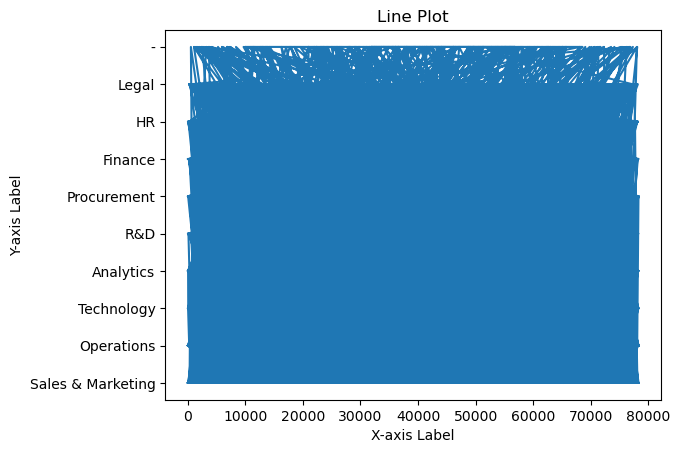

In [48]:
#matplotlib command
#line plot
plt.plot(df['EmployeeID'],df['Department'])
plt.title('Line Plot')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

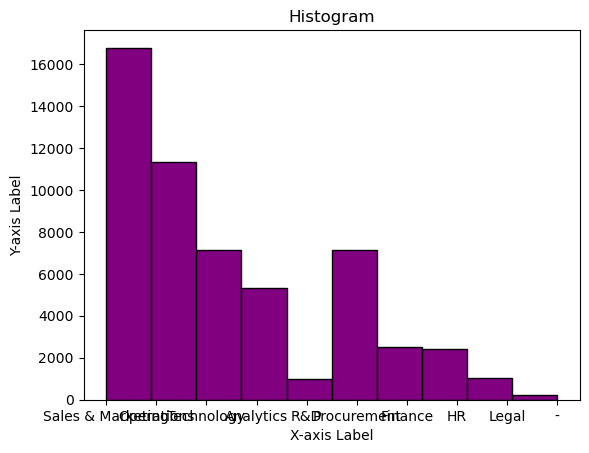

In [49]:
#histogram
plt.hist(df['Department'],bins=10,color='purple',edgecolor='black')
plt.title('Histogram')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

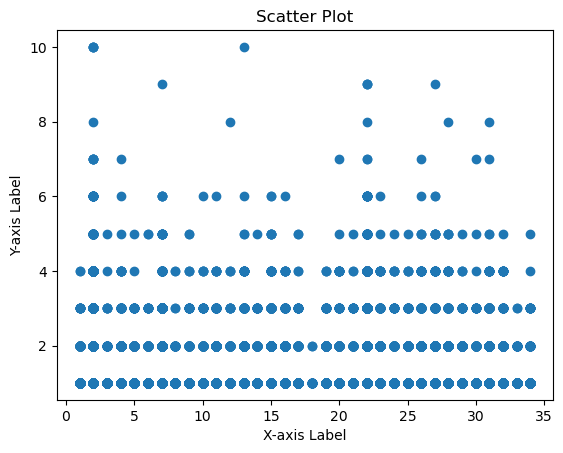

In [52]:
#scatter plot
plt.scatter(df['Region_Employment'],df['NO_Trainings_LstYear'])
plt.title('Scatter Plot')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

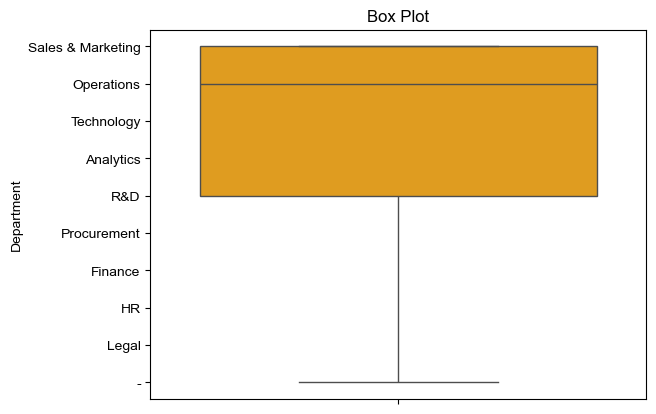

In [54]:
#seaborn 
#boxplot
sns.boxplot(data=df,y='Department',color='orange')
sns.set_theme(style="dark")
plt.title("Box Plot")
plt.show()

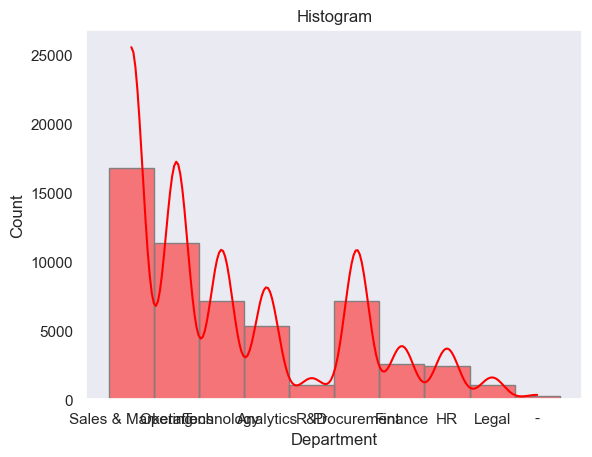

In [56]:
#histogram (univariate analysis)
sns.histplot(df['Department'],kde=True,color='red',edgecolor='grey')
plt.title("Histogram")
plt.show()

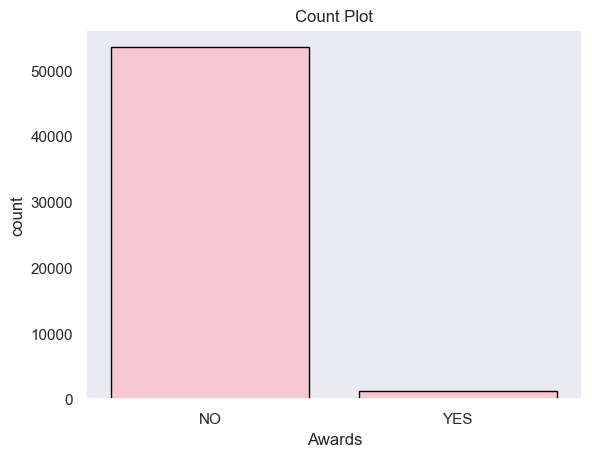

In [58]:
#bar plot (categorical data)
sns.countplot(data=df,x='Awards',color='Pink',edgecolor='black')
plt.title("Count Plot")
plt.show()

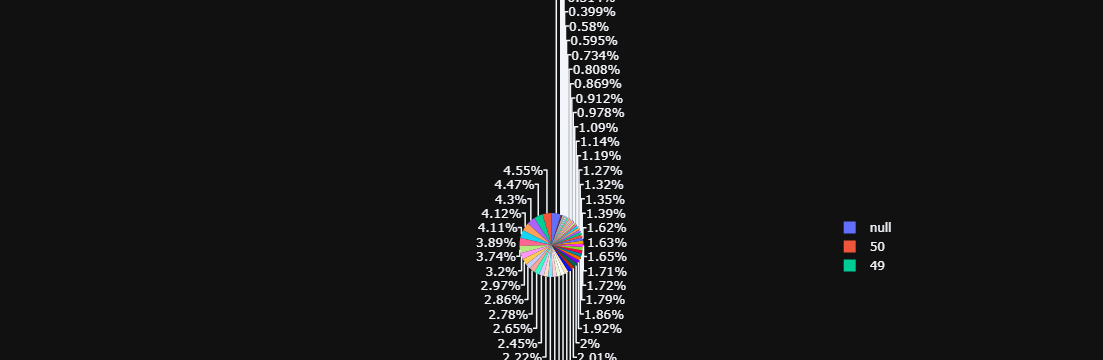

In [60]:
#plotly
#pie chart
px.pie(df,values='previous_year_rating',names='Avg_Training_Score',template='plotly_dark')

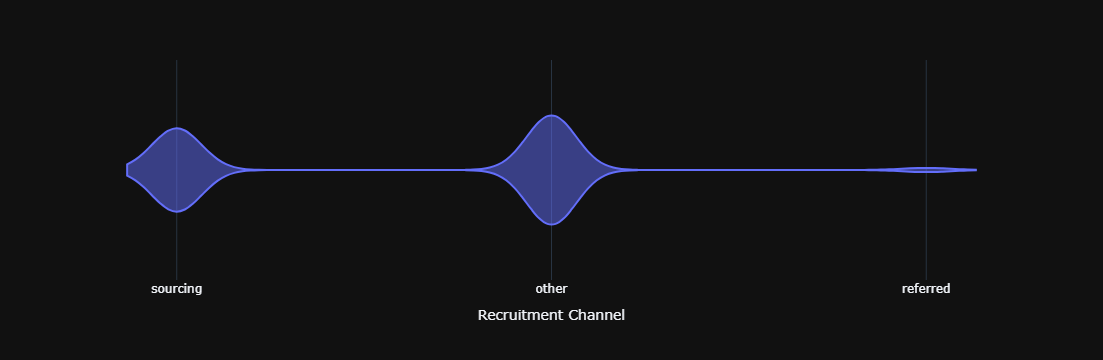

In [63]:
px.violin(df,df['Recruitment Channel'],template='plotly_dark')

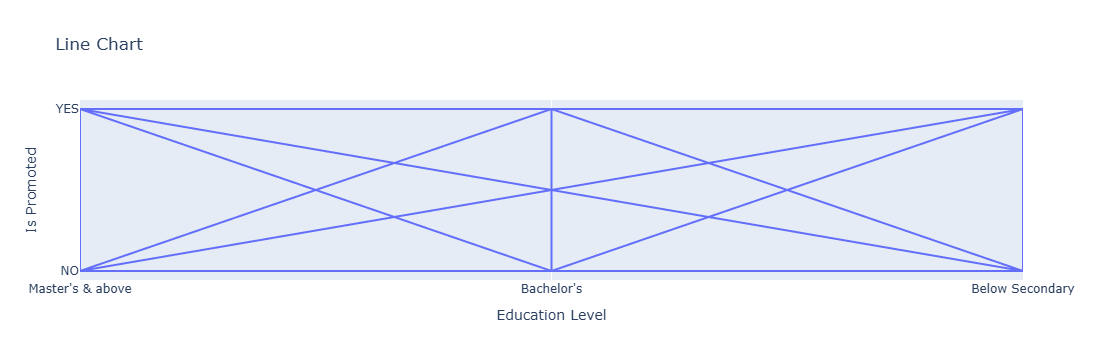

In [71]:
#CREATE PLOTS
#line chart
fig_line = px.line(df,x='Education Level',y='Is Promoted',title="Line Chart")
fig_line.show()

In [73]:
print(df)

       EmployeeID         Department  Region_Employment   Education Level  \
0           65438  Sales & Marketing                  7  Master's & above   
1           65141         Operations                 22        Bachelor's   
2            7513  Sales & Marketing                 19        Bachelor's   
3            2542  Sales & Marketing                 23        Bachelor's   
4           48945         Technology                 26        Bachelor's   
...           ...                ...                ...               ...   
54803        3030         Technology                 14        Bachelor's   
54804       74592         Operations                 27  Master's & above   
54805       13918          Analytics                  1        Bachelor's   
54806       13614  Sales & Marketing                  9               NaN   
54807       51526                 HR                 22        Bachelor's   

      Gender Recruitment Channel  NO_Trainings_LstYear   age  \
0          

In [75]:
for i in df:
    print(i)
   

EmployeeID
Department
Region_Employment
Education Level
Gender
Recruitment Channel
NO_Trainings_LstYear
age
previous_year_rating
Service Length
Awards
Avg_Training_Score
Is Promoted
dept


In [77]:
for i in df:
    print(i)
    print(df[i].unique())
    

EmployeeID
[65438 65141  7513 ... 13918 13614 51526]
Department
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal' '-']
Region_Employment
[ 7 22 19 23 26  2 20 34  1  4 29 31 15 14 11  5 28 17 13 16 25 10 27 30
 12 21  8 32  6 33 24  3  9 18]
Education Level
["Master's & above" "Bachelor's" nan 'Below Secondary']
Gender
['f' 'm']
Recruitment Channel
['sourcing' 'other' nan 'referred']
NO_Trainings_LstYear
[ 1  2  3  4  7  5  6  8 10  9]
age
[35. 30. 34. 39. 45. 31. 33. 28. 32. 49. 37. 38. 41. 27. 29. 26. 24. 57.
 40. 42. 23. 59. nan 50. 56. 20. 25. 47. 36. 46. 44. 60.  0. 43. 22. 54.
 58. 48. 53. 55. 51. 52. 21.]
previous_year_rating
[ 5.  3.  1.  4. nan  2.]
Service Length
[ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17 14 13 19 15 23 18 20 22 25
 28 24 31 21 29 30 34 27 33 32 37]
Awards
['NO' 'YES']
Avg_Training_Score
[49. 60. 50. 73. 85. 59. 63. 83. 54. 77. 80. 84. 51. 46. 75. 57. 70. 68.
 79. 44. 72. nan 48. 58. 87. 47. 52. 88. 71. 

In [79]:
for i in df:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())
    
    

EmployeeID
[65438 65141  7513 ... 13918 13614 51526]
54808
Department
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal' '-']
10
Region_Employment
[ 7 22 19 23 26  2 20 34  1  4 29 31 15 14 11  5 28 17 13 16 25 10 27 30
 12 21  8 32  6 33 24  3  9 18]
34
Education Level
["Master's & above" "Bachelor's" nan 'Below Secondary']
3
Gender
['f' 'm']
2
Recruitment Channel
['sourcing' 'other' nan 'referred']
3
NO_Trainings_LstYear
[ 1  2  3  4  7  5  6  8 10  9]
10
age
[35. 30. 34. 39. 45. 31. 33. 28. 32. 49. 37. 38. 41. 27. 29. 26. 24. 57.
 40. 42. 23. 59. nan 50. 56. 20. 25. 47. 36. 46. 44. 60.  0. 43. 22. 54.
 58. 48. 53. 55. 51. 52. 21.]
42
previous_year_rating
[ 5.  3.  1.  4. nan  2.]
5
Service Length
[ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17 14 13 19 15 23 18 20 22 25
 28 24 31 21 29 30 34 27 33 32 37]
35
Awards
['NO' 'YES']
2
Avg_Training_Score
[49. 60. 50. 73. 85. 59. 63. 83. 54. 77. 80. 84. 51. 46. 75. 57. 70. 68.
 79. 44. 72. n

In [81]:
for i in df:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())
    print()
    

EmployeeID
[65438 65141  7513 ... 13918 13614 51526]
54808

Department
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal' '-']
10

Region_Employment
[ 7 22 19 23 26  2 20 34  1  4 29 31 15 14 11  5 28 17 13 16 25 10 27 30
 12 21  8 32  6 33 24  3  9 18]
34

Education Level
["Master's & above" "Bachelor's" nan 'Below Secondary']
3

Gender
['f' 'm']
2

Recruitment Channel
['sourcing' 'other' nan 'referred']
3

NO_Trainings_LstYear
[ 1  2  3  4  7  5  6  8 10  9]
10

age
[35. 30. 34. 39. 45. 31. 33. 28. 32. 49. 37. 38. 41. 27. 29. 26. 24. 57.
 40. 42. 23. 59. nan 50. 56. 20. 25. 47. 36. 46. 44. 60.  0. 43. 22. 54.
 58. 48. 53. 55. 51. 52. 21.]
42

previous_year_rating
[ 5.  3.  1.  4. nan  2.]
5

Service Length
[ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17 14 13 19 15 23 18 20 22 25
 28 24 31 21 29 30 34 27 33 32 37]
35

Awards
['NO' 'YES']
2

Avg_Training_Score
[49. 60. 50. 73. 85. 59. 63. 83. 54. 77. 80. 84. 51. 46. 75. 57. 70. 68.
 79